In [1]:
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import pandas as pd
import plotly.graph_objs as go
import numpy as np

plotly.__version__

pd.options.plotting.backend = "plotly"

# setup
init_notebook_mode(connected=True)


# Visualizing vectors

In [2]:
creepy = pd.read_pickle('./pickles/creepy.pickle')
noncreepy = pd.read_pickle('./pickles/noncreepy.pickle')

In [3]:
creepy_sum_vec_with_log_prepended = creepy.loc[:,'vec'].copy()
noncreepy_sum_vec_with_log_prepended = noncreepy.loc[:,'vec'].copy()

In [4]:
creepy_features = pd.DataFrame(creepy_sum_vec_with_log_prepended.to_list()).to_numpy(dtype = float)
creepy_labels = np.ones(len(creepy_features))

In [5]:
noncreepy_features = pd.DataFrame(noncreepy_sum_vec_with_log_prepended.to_list()).to_numpy(dtype = float)
noncreepy_labels = np.zeros(len(noncreepy_features))

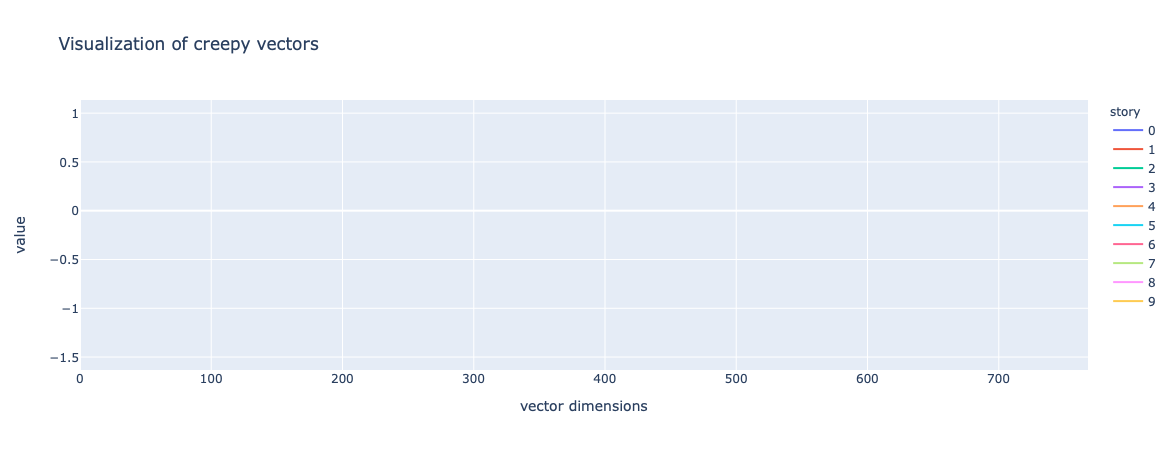

In [7]:
creepy_features_df = pd.DataFrame(creepy_features).head(10).transpose()
fig = creepy_features_df.plot(title = "Visualization of creepy vectors",
                             labels = dict(index = "vector dimensions", value = "value", variable = "story"))
fig.show()

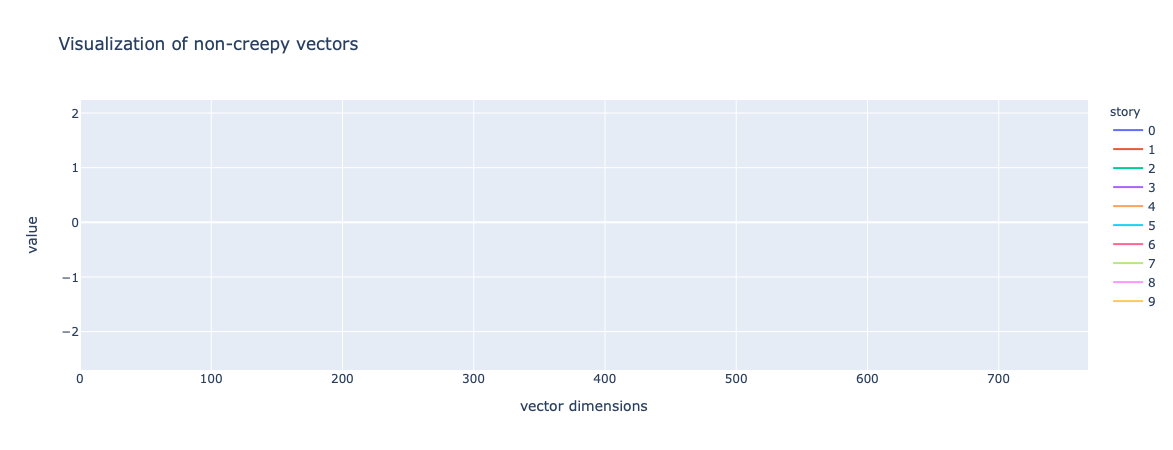

In [8]:
noncreepy_features_df = pd.DataFrame(noncreepy_features).head(10).transpose()
fig = noncreepy_features_df.plot(title = "Visualization of non-creepy vectors",
                             labels = dict(index = "vector dimensions", value = "value", variable = "story"))
fig.show()

# Distribution of scores and log scores

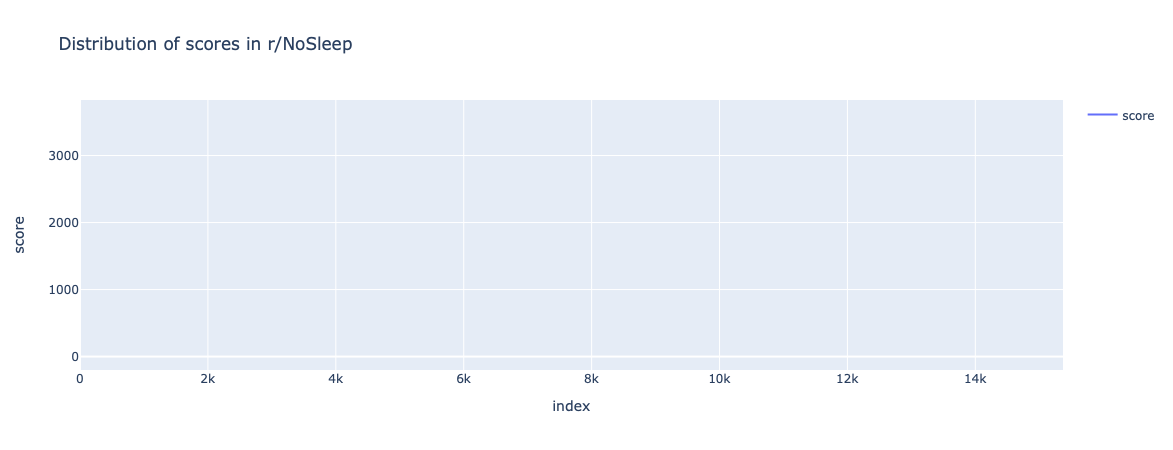

In [32]:
fig = creepy.loc[:, 'score'].plot(title = "Distribution of scores in r/NoSleep",
                             labels = dict(index = "index", value = "score", variable = ""))
fig.show()

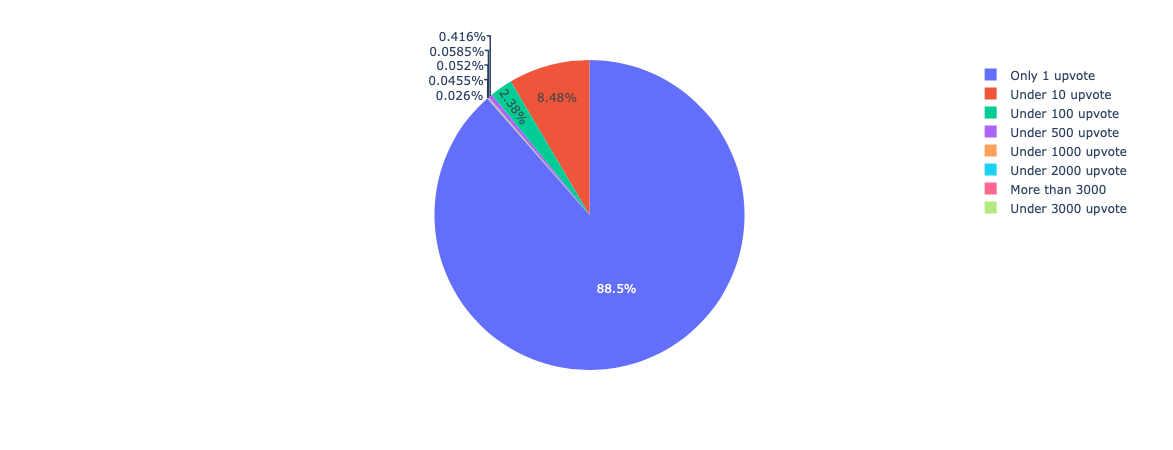

In [13]:
import plotly.express as px
scores = creepy.loc[:, 'score'].copy()
scores = pd.cut(scores, bins=[0,1,10,100, 500,1000, 2000, 3000, 1000000000], labels=['Only 1 upvote','Under 10 upvote','Under 100 upvote','Under 500 upvote','Under 1000 upvote','Under 2000 upvote','Under 3000 upvote', 'More than 3000'])
fig = px.pie(scores, names='score')
fig.show()
# scores

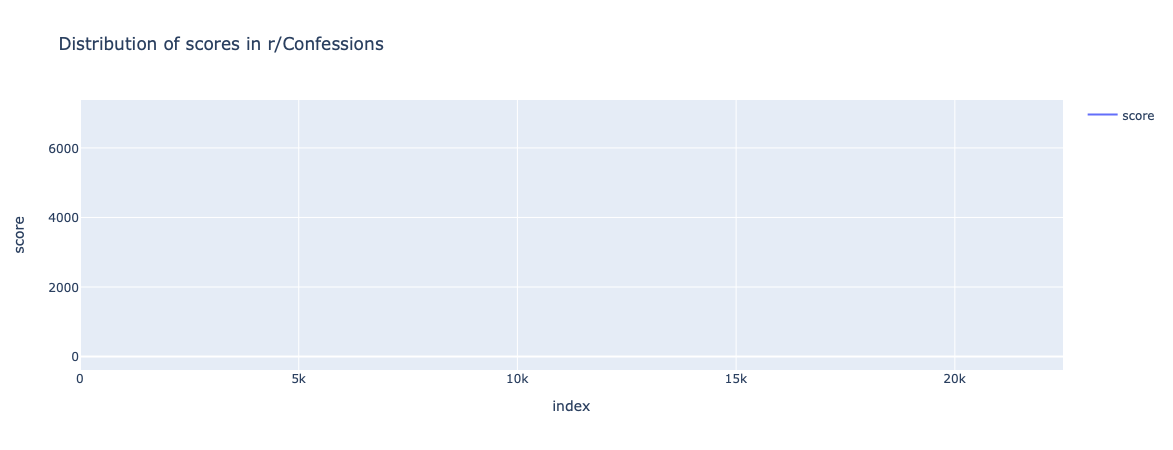

In [25]:
fig = noncreepy.loc[:, 'score'].plot(title = "Distribution of scores in r/Confessions",
                             labels = dict(index = "index", value = "score", variable = ""))
fig.show()

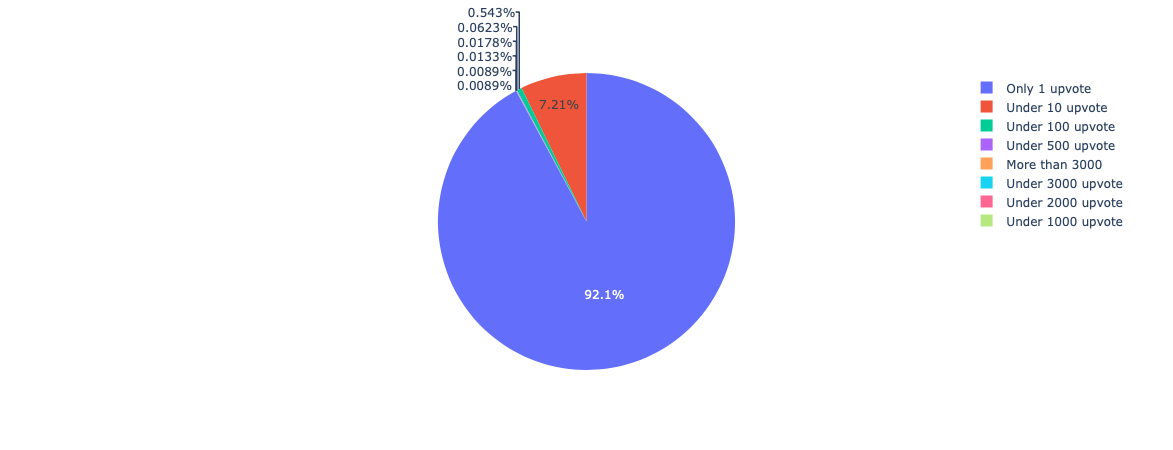

In [14]:
import plotly.express as px
scores = noncreepy.loc[:, 'score'].copy()
scores = pd.cut(scores, bins=[0,1,10,100, 500,1000, 2000, 3000, 1000000000], labels=['Only 1 upvote','Under 10 upvote','Under 100 upvote','Under 500 upvote','Under 1000 upvote','Under 2000 upvote','Under 3000 upvote', 'More than 3000'])
fig = px.pie(scores, names='score')
fig.show()

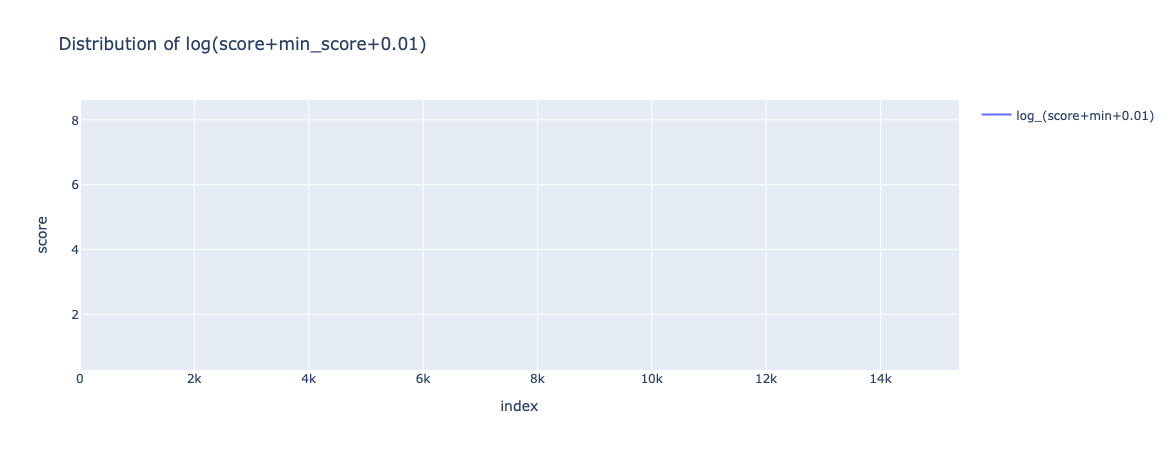

In [26]:
fig = creepy.loc[:, 'log_(score+min+0.01)'].plot(title = "Distribution of log(score+min_score+0.01) in r/NoSleep",
                             labels = dict(index = "index", value = "score", variable = ""))
fig.show()

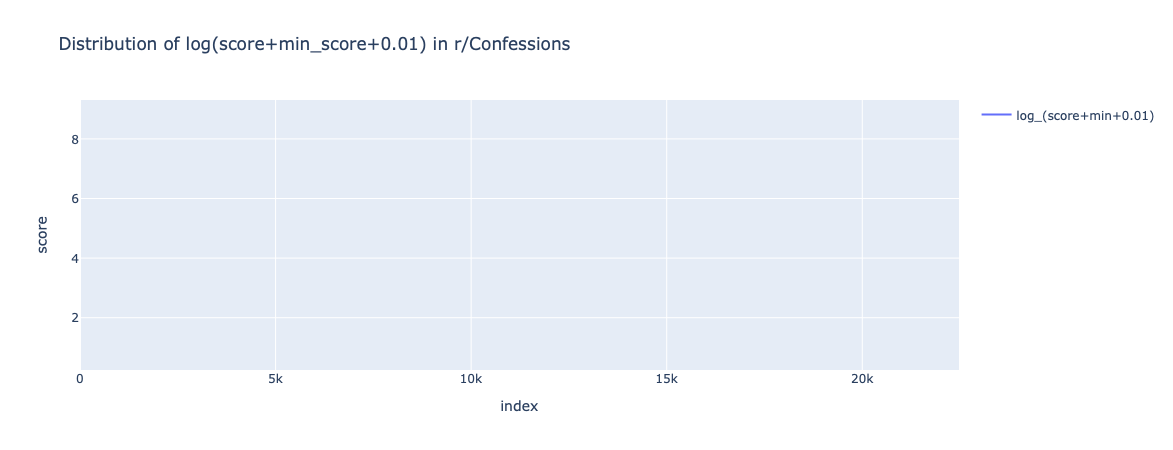

In [27]:
fig = noncreepy.loc[:, 'log_(score+min+0.01)'].plot(title = "Distribution of log(score+min_score+0.01) in r/Confessions",
                             labels = dict(index = "index", value = "score", variable = ""))
fig.show()

# Sentence Count distributions

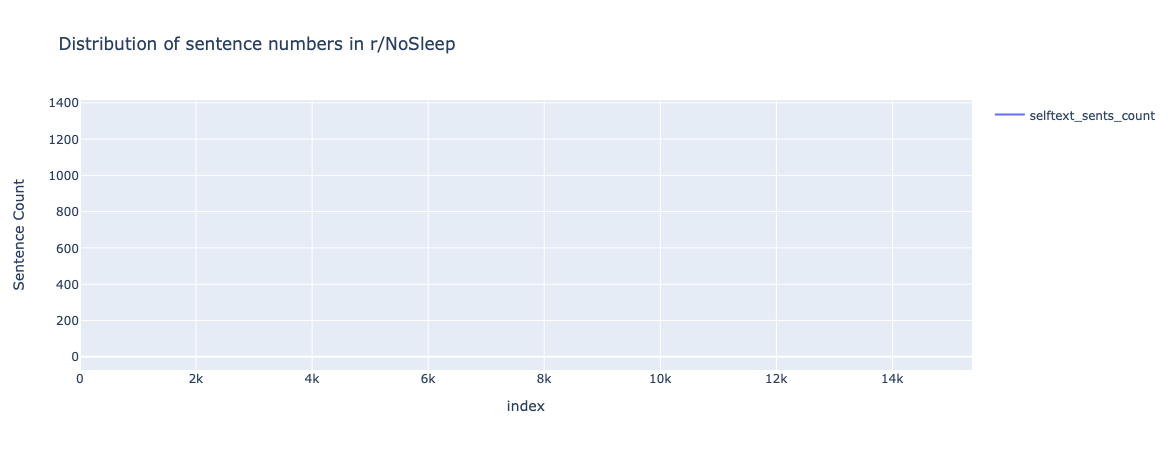

In [36]:
fig = creepy.loc[:, 'selftext_sents_count'].plot(title = "Distribution of sentence numbers in r/NoSleep",
                             labels = dict(index = "index", value = "Sentence Count", variable = ""))
fig.show()

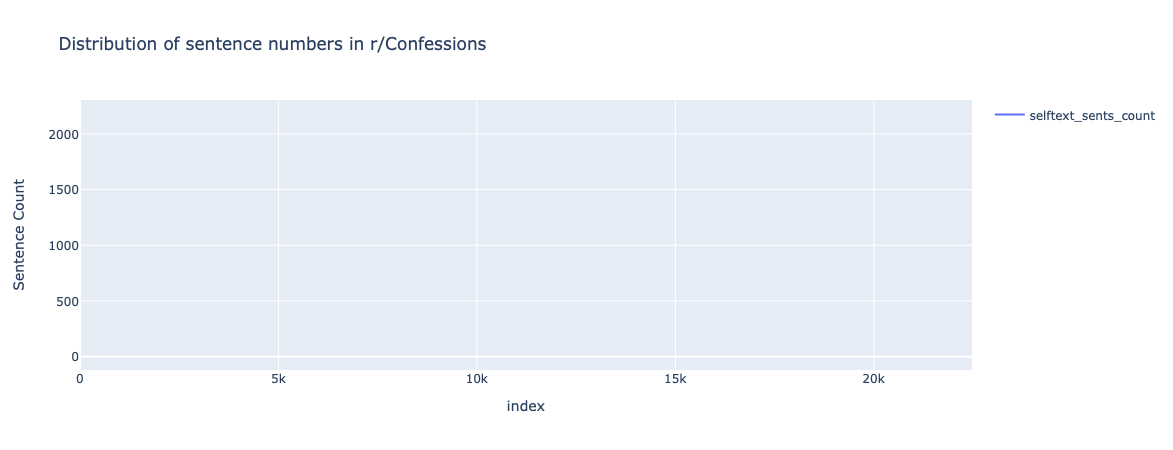

In [38]:
fig = noncreepy.loc[:, 'selftext_sents_count'].plot(title = "Distribution of sentence numbers in r/Confessions",
                             labels = dict(index = "index", value = "Sentence Count", variable = ""))
fig.show()

In [10]:
creepy

index      id                                              title  \
0          0  gxsa0i                   Do NOT Open Your Eyes... (Pt. 1)   
1          1  gxs6jf             Do NOT open your eyes. (The Beginning)   
2          2  gxrytp             My Best Friend Saw Bugs Under His Skin   
3          3  gxrnj7  I picked up a hitchhiker by mistake, now he's ...   
4          4  gxrm8v  I'm tasked with killing nameless things out in...   
...      ...     ...                                                ...   
15367  15367  eihp0m                                         Hylophobia   
15368  15368  eihmg7  I adopted my late sisters orphaned child. This...   
15369  15369  eihgtp                   My first paranormal experience!!   
15370  15370  eigzgj  I met the demon under my bed... Its not what I...   
15371  15371  eiggxr                                   The Perfect Wife   

                                                selftext  score  \
0      This is the only rule of our household. If you...      1   
1      This is the only rule of our household. If you...      1   
2      It is hard for me to talk about my old friend ...      1   
3      They say the devil is in the details.  Well th...      1   
4      “Any sign of ‘em yet?” \n\nI continued staring...      1   
...                                                  ...    ...   
15367  *There is no cure for trauma. Once it enters t...      1   
15368  I knew Persephone would need time to adjust, b...      1   
15369  This isnt much, but this is surely the first u...      1   
15370  Okay. for context, this story started about a ...      1   
15371  &amp;#x200B;\n\nI  was never able to find love...      1   

                                                 sum_vec  \
0      [2.940986, -5.617336, 11.896912, -15.436118, -...   
1      [2.940986, -5.617336, 11.896912, -15.436118, -...   
2      [-19.201273, -13.715499, 24.393753, -33.97739,...   
3      [-60.77887, -33.726135, 119.47121, -95.021385,...   
4      [-22.785084, 14.806147, 26.129469, -24.832222,...   
...                                                  ...   
15367  [-51.169456, -5.836507, 70.7862, -111.05138, 7...   
15368  [-22.327501, -34.563572, 39.197514, -72.437645...   
15369  [-4.7810946, 0.12821773, 2.941056, -3.949329, ...   
15370  [-1.7662485, -4.471965, 8.116567, -12.409156, ...   
15371  [2.2265594, -10.923081, 8.348171, -10.28161, 0...   

       log_(score+min+0.01)  \
0                  0.698135   
1                  0.698135   
2                  0.698135   
3                  0.698135   
4                  0.698135   
...                     ...   
15367              0.698135   
15368              0.698135   
15369              0.698135   
15370              0.698135   
15371              0.698135   

                              sum_vec_with_log_prepended  \
0      [0.6981347, 2.940986, -5.617336, 11.896912, -1...   
1      [0.6981347, 2.940986, -5.617336, 11.896912, -1...   
2      [0.6981347, -19.201273, -13.715499, 24.393753,...   
3      [0.6981347, -60.77887, -33.726135, 119.47121, ...   
4      [0.6981347, -22.785084, 14.806147, 26.129469, ...   
...                                                  ...   
15367  [0.6981347, -51.169456, -5.836507, 70.7862, -1...   
15368  [0.6981347, -22.327501, -34.563572, 39.197514,...   
15369  [0.6981347, -4.7810946, 0.12821773, 2.941056, ...   
15370  [0.6981347, -1.7662485, -4.471965, 8.116567, -...   
15371  [0.6981347, 2.2265594, -10.923081, 8.348171, -...   

       selftext_sents_count                                                vec  
0                        38  [0.6981347, 0.077394366, -0.14782463, 0.313076...  
1                        38  [0.6981347, 0.077394366, -0.14782463, 0.313076...  
2                        81  [0.6981347, -0.23705275, -0.16932714, 0.301157...  
3                       429  [0.6981347, -0.14167568, -0.0786157, 0.2784876...  
4                       177  [0.6981347, -0.12872928, 0.083650544, 0.147624...  
